In [62]:
import pandas as pd
import numpy as np
from google2pandas import *
import matplotlib as mpl
import matplotlib.pyplot as plt
import sys
from geonamescache import GeonamesCache
from geonamescache.mappers import country
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection\
from mpl_toolkits import mplot3d
from scipy import stats
import matplotlib.patches as mpatches
import plotly
import chart_studio.plotly as py
from IPython.display import Image
from plotly import tools
from plotly.graph_objs import *

In [63]:
from getpass import getpass
import json # JSON encoder and decoder for Python
import requests # Library for sending HTTP requests

#### Get API link from here
https://ga-dev-tools.appspot.com/query-explorer/#report-end


In [83]:
api_query_uri = getpass('Enter API Query URI here')

Enter API Query URI here··········


In [84]:
r = requests.get(api_query_uri) # make the request
data= r.json() # read data from a JSON format
df1 = pd.DataFrame(data['rows']) # turn data into a Pandas data frame
df1 = df1.rename(columns={0: 'Date', 1: 'Sessions'}) # giving the columns some proper titles
df1['Sessions'] = df1['Sessions'].astype(int) # formatting sessions as ints
df1['Date'] = pd.to_datetime(df1['Date'])

df1.head() # printing the first five rows

,Date,Sessions
0,2019-01-01,17
1,2019-01-02,16
2,2019-01-03,11
3,2019-01-04,14
4,2019-01-05,16


In [85]:
api_query_uri = getpass('Enter API Query URI here')

Enter API Query URI here··········


In [86]:
r = requests.get(api_query_uri) # make the request
data= r.json() # read data from a JSON format
df = pd.DataFrame(data['rows']) # turn data into a Pandas data frame
df = df.rename(columns={0: 'Device Category', 1: 'Country', 2: 'Date', 3:'Session'}) # giving the columns some proper titles
df['Date'] = pd.to_datetime(df['Date'])
df['Device Category'] = df['Device Category'].astype(str) 
df['Country'] = df['Country'].astype(str) 
df['Session'] = df['Session'].astype(int) # formatting sessions as ints

df.head() # printing the first five rows

,Device Category,Country,Date,Session
0,desktop,(not set),2019-01-05,1
1,desktop,(not set),2019-01-07,1
2,desktop,(not set),2019-01-11,2
3,desktop,(not set),2019-01-29,1
4,desktop,(not set),2019-02-01,1


In [91]:
df.to_csv('session_date_country.csv',index=False)
df1.to_csv('session_date.csv',index=False)

In [184]:
d = pd.read_csv('session_date.csv', index_col=0, parse_dates=True )
d.head()

,Sessions
Date,
2019-01-01,17
2019-01-02,16
2019-01-03,11
2019-01-04,14
2019-01-05,16


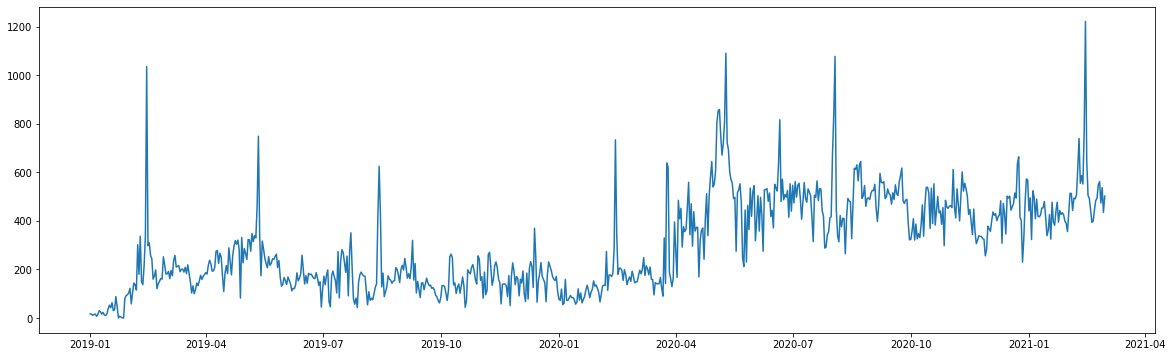

In [129]:
plt.figure(figsize=(20,6))
plt.plot(d)
pyplot.show()

Text(0, 0.5, 'Users')

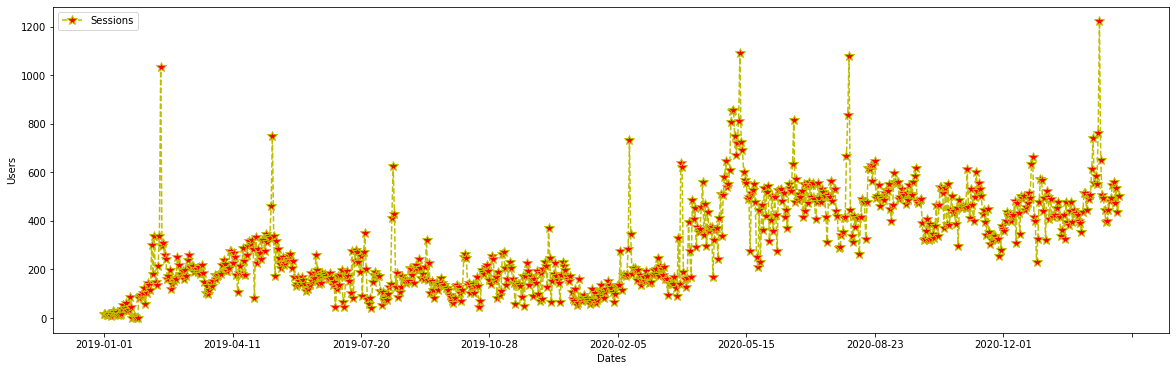

In [139]:
d.plot(x='Date',y='Sessions',figsize=(20,6),linestyle='--', marker='*', markerfacecolor='r',color='y',markersize=10)

plt.xlabel('Dates')
plt.ylabel('Users')

In [150]:
d.describe()

,Sessions
count,791.000000
mean,298.554994
std,187.059015
min,0.000000
25%,151.000000
50%,246.000000
75%,451.500000
max,1222.000000


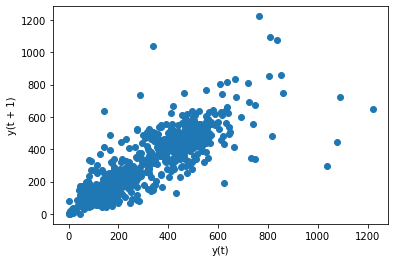

In [161]:
pd.plotting.lag_plot(d['Sessions'])

In [185]:
import plotly.express as px
df = pd.read_csv('session_date_country.csv')
df.head()

,Device Category,Country,Date,Session
0,desktop,(not set),2019-01-05,1
1,desktop,(not set),2019-01-07,1
2,desktop,(not set),2019-01-11,2
3,desktop,(not set),2019-01-29,1
4,desktop,(not set),2019-02-01,1


In [158]:
df["Country"]= df["Country"].replace('(not set)', "NA") 

In [159]:
df.head()

,Device Category,Country,Date,Session
0,desktop,NA,2019-01-05,1
1,desktop,NA,2019-01-07,1
2,desktop,NA,2019-01-11,2
3,desktop,NA,2019-01-29,1
4,desktop,NA,2019-02-01,1


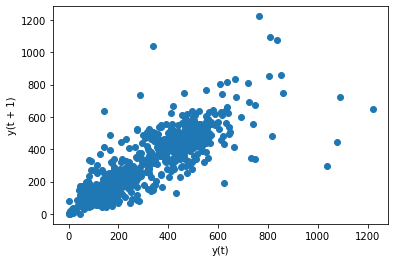

In [160]:
pd.plotting.lag_plot(d['Sessions'])

In [202]:
d = pd.read_csv('session_date.csv')

In [204]:
d['Month'] = pd.to_datetime(d.Date).dt.to_period('m').dt.strftime('%Y-%m')
d['Month'] = pd.to_datetime(d['Month'], errors='coerce')
d['Month_Name'] = d['Month'].dt.month
d['Year']=d['Month'].dt.year

In [206]:
d.head()

,Date,Sessions,Month,Month_Name,Year
0,2019-01-01,17,2019-01-01,1,2019
1,2019-01-02,16,2019-01-01,1,2019
2,2019-01-03,11,2019-01-01,1,2019
3,2019-01-04,14,2019-01-01,1,2019
4,2019-01-05,16,2019-01-01,1,2019


In [182]:
fig, ax = plt.subplots(figsize=(15,6))

for name, group in d.groupby('Year'):
    group.plot(x='Month_name',y='Passenger', ax=ax, label=name)

plt.show()

0      2019-01
1      2019-01
2      2019-01
3      2019-01
4      2019-01
        ...   
786    2021-02
787    2021-02
788    2021-02
789    2021-02
790    2021-03
Name: Date, Length: 791, dtype: object

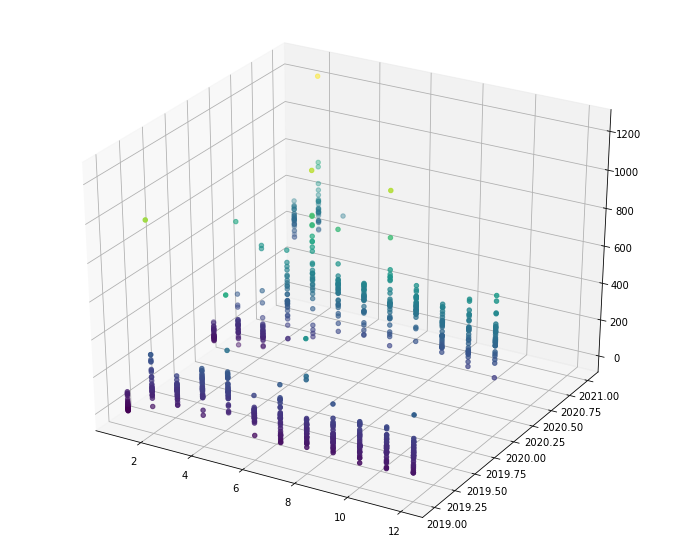

In [212]:
plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
ydata = d['Year']
xdata = d['Month_Name']
zdata = d['Sessions']
ax.scatter3D(xdata, ydata, zdata, c=zdata);

* Moving Average(MA) and Exponential Weighted Moving Average(EWMA) is a rolling window function and is very critical steps for time series analysis which is used to aggregate the data and compress it.

* These functions are used to smooth the data to remove outliers and noise from the data and allowing the patterns and trends in data more visible and standout. It will smooth out short-term fluctuations and highlight longer-term trends or cycles

In [213]:
d['rolling_mean']=d['Sessions'].rolling(12).mean()

In [217]:
d.sample(10)

,Date,Sessions,Month,Month_Name,Year,rolling_mean
775,2021-02-14,1222,2021-02-01,2,2021,623.500000
683,2020-11-14,503,2020-11-01,11,2020,507.666667
98,2019-04-09,275,2019-04-01,4,2019,202.166667
57,2019-02-27,252,2019-02-01,2,2019,194.250000
283,2019-10-11,136,2019-10-01,10,2019,144.333333
10,2019-01-11,23,2019-01-01,1,2019,NaN
644,2020-10-06,326,2020-10-01,10,2020,397.166667
685,2020-11-16,447,2020-11-01,11,2020,491.500000
368,2020-01-04,55,2020-01-01,1,2020,144.250000
314,2019-11-11,160,2019-11-01,11,2019,173.500000


In [219]:
d.head(15)

,Date,Sessions,Month,Month_Name,Year,rolling_mean
0,2019-01-01,17,2019-01-01,1,2019,NaN
1,2019-01-02,16,2019-01-01,1,2019,NaN
2,2019-01-03,11,2019-01-01,1,2019,NaN
3,2019-01-04,14,2019-01-01,1,2019,NaN
4,2019-01-05,16,2019-01-01,1,2019,NaN
5,2019-01-06,7,2019-01-01,1,2019,NaN
6,2019-01-07,15,2019-01-01,1,2019,NaN
7,2019-01-08,30,2019-01-01,1,2019,NaN
8,2019-01-09,26,2019-01-01,1,2019,NaN
9,2019-01-10,16,2019-01-01,1,2019,NaN


* Exponential Smoothing(EWMA) unlike moving average which doesn’t treat all the data points equally while smoothing. Most of the time in a Time series data we want to treat the most recent data with more weight than the previous data

* n EWMA we are weighting the more recent points higher than the lags or lesser recent points. You can read more about smoothing and EWMA in this post

* Let’s Calculate the EWMA for our data using Pandas ewm() function with a smoothing level of 0.6. You can try with different alpha levels and check the output and use the most appropriate alpha level for your data



In [220]:
d['EWM_ALPHA_06'] = d['Sessions'].ewm(alpha=0.2).mean()

In [222]:
d.tail()

,Date,Sessions,Month,Month_Name,Year,rolling_mean,EWM_ALPHA_06
786,2021-02-25,562,2021-02-01,2,2021,553.416667,520.968183
787,2021-02-26,474,2021-02-01,2,2021,491.083333,511.574546
788,2021-02-27,537,2021-02-01,2,2021,481.750000,516.659637
789,2021-02-28,435,2021-02-01,2,2021,475.916667,500.327710
790,2021-03-01,502,2021-03-01,3,2021,476.666667,500.662168


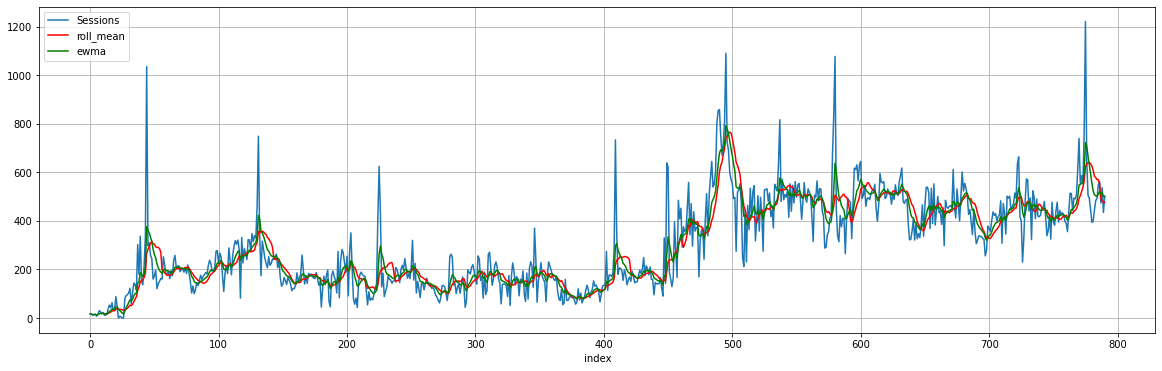

In [224]:
d.reset_index().plot(figsize=(20,6),kind='line',x = 'index', y = 'Sessions')
plt.grid(True)
plt.plot(d['rolling_mean'],label='roll_mean',color='r')
plt.plot(d['EWM_ALPHA_06'],label='ewma',color='g')
plt.legend(loc=2)
plt.show()

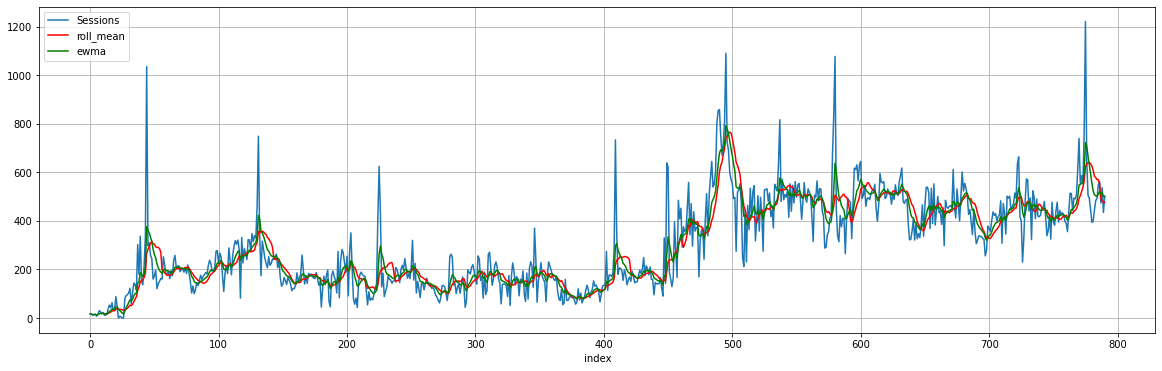

In [226]:
d.reset_index().plot(figsize=(20,6),kind='line',x = 'index', y = 'Sessions')
plt.grid(True)
plt.plot(d['rolling_mean'],label='roll_mean',color='r')
plt.plot(d['EWM_ALPHA_06'],label='ewma',color='g')
plt.legend(loc=2)
plt.show()

In [231]:
import plotly.express as px
df = px.data.gapminder()
px.scatter(d, x="Sessions", y="Date", animation_frame="Year", animation_group="Month",
           color="Year",
           log_x=True, size_max=55, range_x=[100,1000], range_y=[25,90])

In [228]:
df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
